# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Utilizar apenas duas características para visualização em 2D
y = iris.target
# Filtrar para manter apenas duas classes (0 e 1)
X = X[y != 2]
y = y[y != 2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treinar o modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [4]:
# 4. Obter o hiperplano e as margens de separação
w = model.coef_[0]  # Coeficientes do modelo
slope = -w[0] / w[1]  # Inclinacao do hiperplano
intercept = -model.intercept_[0] / w[1]  # Intercepto do hiperplano

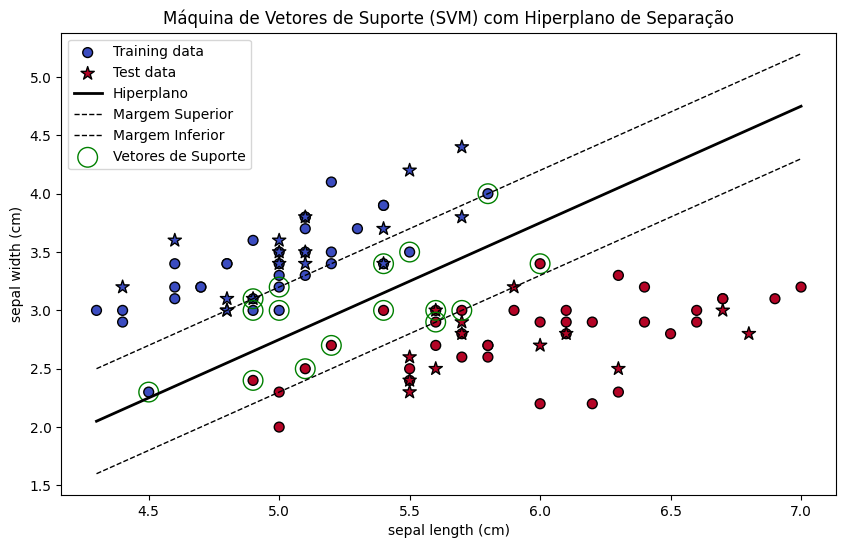

In [5]:
# 5. Funções para os limites das margens
def decision_boundary(x):
    return slope * x + intercept

def margin_upper(x):
    return slope * x + intercept + 1 / w[1]

def margin_lower(x):
    return slope * x + intercept - 1 / w[1]

# 6. Criar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=100, marker='*', edgecolors='k', label='Test data')

# Plotar o hiperplano e as margens
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.plot(x_vals, decision_boundary(x_vals), 'k-', linewidth=2, label='Hiperplano')
plt.plot(x_vals, margin_upper(x_vals), 'k--', linewidth=1, label='Margem Superior')
plt.plot(x_vals, margin_lower(x_vals), 'k--', linewidth=1, label='Margem Inferior')

# 7. Realçar os vetores de suporte
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, edgecolor='g', facecolor='none', label='Vetores de Suporte')

# 8. Personalizar o gráfico
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Máquina de Vetores de Suporte (SVM) com Hiperplano de Separação')
plt.legend()
plt.show()